# Divergence

Theoretical example based on:

https://www.khanacademy.org/math/multivariable-calculus/multivariable-derivatives/divergence-and-curl-articles/a/divergence


## Preliminary command and imports

In order to plot fields, we run the following command:

In [155]:
%matplotlib inline
import matplotlib.pyplot as plt

The modules to import for dealing with grids are:

In [156]:
from pygsf.mathematics.arrays import divergence_2D

In [157]:
from pygsf.spatial.rasters.geotransform import *

In [158]:
from pygsf.spatial.rasters.mapping import *

## Geotransform

The geotransform defines the raster-to-geographic coordinates mapping.

In [159]:
gt1 = GeoTransform(1500, 3000, 10, 10)

## Z transfer functions

These functions define the value of the cells, from the provided x and y geographic coordinates.

In [160]:
def z_func_fx(x, y):

    return 2*x - y

def z_func_fy(x, y):

    return y * y

def z_func_div(x, y):
    
    return 2 + 2*y

## Z fields (x and y components)

The gridded field values are calculated for the vector field x- and y- components, as well as the expected teorethical divergence field. 

In [161]:
rows=100; cols=100

### Vector field x-component

In [162]:
fx = array_from_function(row_num=rows, col_num=cols, geotransform=gt1, z_transfer_func=z_func_fx)

In [163]:
print(fx)

[[  15.   35.   55. ... 1955. 1975. 1995.]
 [  25.   45.   65. ... 1965. 1985. 2005.]
 [  35.   55.   75. ... 1975. 1995. 2015.]
 ...
 [ 985. 1005. 1025. ... 2925. 2945. 2965.]
 [ 995. 1015. 1035. ... 2935. 2955. 2975.]
 [1005. 1025. 1045. ... 2945. 2965. 2985.]]


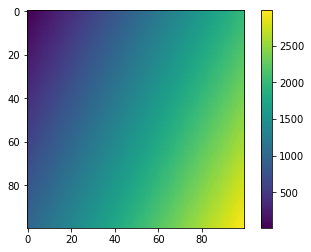

In [164]:
plt.imshow(fx); plt.colorbar()

### Vector field y-component

In [165]:
fy = array_from_function(row_num=rows, col_num=cols, geotransform=gt1, z_transfer_func=z_func_fy)

In [166]:
print(fy)

[[8970025. 8970025. 8970025. ... 8970025. 8970025. 8970025.]
 [8910225. 8910225. 8910225. ... 8910225. 8910225. 8910225.]
 [8850625. 8850625. 8850625. ... 8850625. 8850625. 8850625.]
 ...
 [4100625. 4100625. 4100625. ... 4100625. 4100625. 4100625.]
 [4060225. 4060225. 4060225. ... 4060225. 4060225. 4060225.]
 [4020025. 4020025. 4020025. ... 4020025. 4020025. 4020025.]]


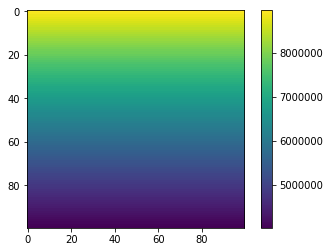

In [167]:
plt.imshow(fy); plt.colorbar()

## Analytically-derived divergence

The expected, theoretical divergence field can be created using the function expressing the analytical derivatives *z_func_div*:

In [168]:
f_div = array_from_function(row_num=rows, col_num=cols, geotransform=gt1, z_transfer_func=z_func_div)

In [169]:
print(f_div)

[[5992. 5992. 5992. ... 5992. 5992. 5992.]
 [5972. 5972. 5972. ... 5972. 5972. 5972.]
 [5952. 5952. 5952. ... 5952. 5952. 5952.]
 ...
 [4052. 4052. 4052. ... 4052. 4052. 4052.]
 [4032. 4032. 4032. ... 4032. 4032. 4032.]
 [4012. 4012. 4012. ... 4012. 4012. 4012.]]


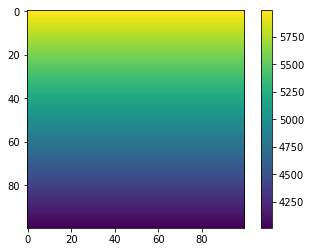

In [170]:
plt.imshow(f_div); plt.colorbar()

## Divergence as estimated by pygsf

Divergence as resulting from pygsf calculation:

In [171]:
div = divergence_2D(fx, fy, 10, 10)

In [172]:
print(div)

[[5992. 5992. 5992. ... 5992. 5992. 5992.]
 [5972. 5972. 5972. ... 5972. 5972. 5972.]
 [5952. 5952. 5952. ... 5952. 5952. 5952.]
 ...
 [4052. 4052. 4052. ... 4052. 4052. 4052.]
 [4032. 4032. 4032. ... 4032. 4032. 4032.]
 [4012. 4012. 4012. ... 4012. 4012. 4012.]]


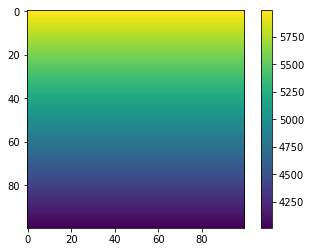

In [ ]:
plt.imshow(div); plt.colorbar()

We check if the theoretical and the estimated divergence fields are close:

In [ ]:
np.allclose(f_div, div)